### Parte 1: Carga y exploración de datos


In [1]:
import pandas as pd

# 1️⃣ Cargar el dataset
data = pd.read_csv("heart.csv")

# 2️⃣ Visualizar primeras filas
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nResumen estadístico:")
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      3

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras y objetivo
X = data.drop('target', axis=1)
y = data['target']

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado (recomendado para KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# 2️⃣ Árbol de decisión
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)  # No requiere escalado
y_pred_tree = tree.predict(X_test)

# Evaluación
print("=== KNN ===")
print(classification_report(y_test, y_pred_knn))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))

print("\n=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))


=== KNN ===
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Matriz de confusión:
 [[27  2]
 [ 4 28]]

=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Matriz de confusión:
 [[26  3]
 [ 6 26]]


In [5]:
from sklearn.model_selection import GridSearchCV

# KNN
param_knn = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print("🔹 Mejor configuración KNN:", grid_knn.best_params_)

# Árbol
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print("🔹 Mejor configuración Árbol:", grid_tree.best_params_)


🔹 Mejor configuración KNN: {'n_neighbors': 16, 'weights': 'uniform'}
🔹 Mejor configuración Árbol: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}


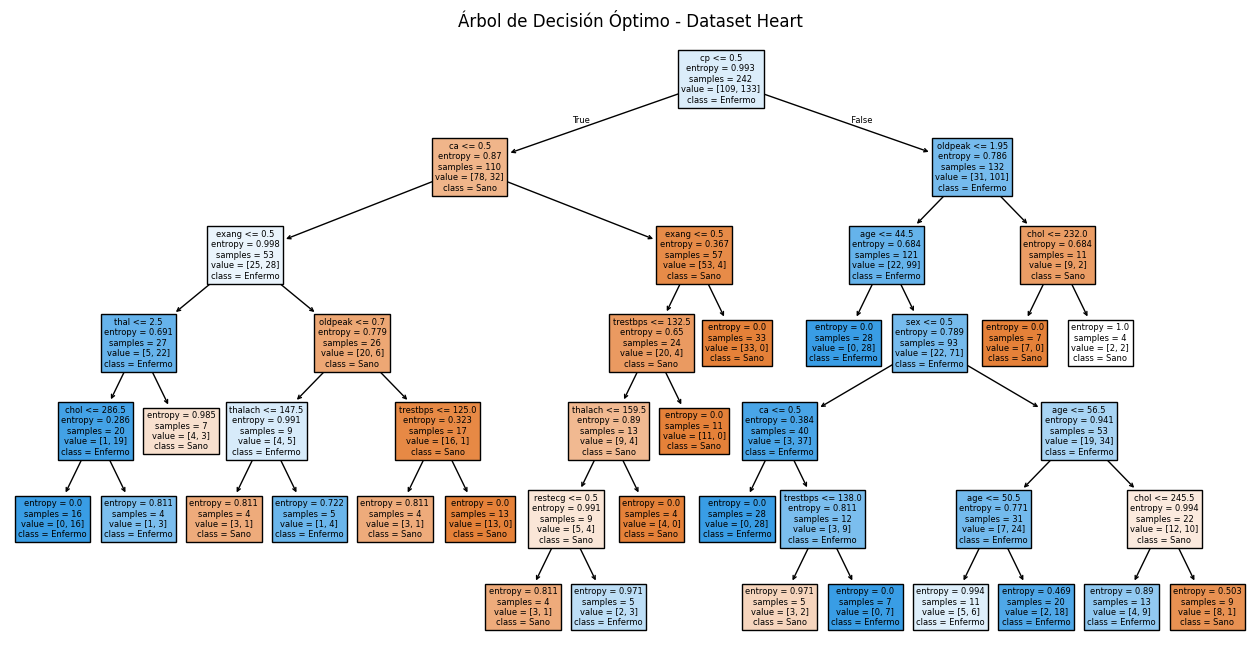

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar árbol final
best_tree = grid_tree.best_estimator_

plt.figure(figsize=(16,8))
plot_tree(best_tree, feature_names=X.columns, class_names=['Sano', 'Enfermo'], filled=True)
plt.title("Árbol de Decisión Óptimo - Dataset Heart")
plt.show()


In [7]:
# Precisión final
acc_knn = accuracy_score(y_test, grid_knn.best_estimator_.predict(X_test_scaled))
acc_tree = accuracy_score(y_test, best_tree.predict(X_test))

print(f"🔹 Precisión KNN: {acc_knn:.4f}")
print(f"🔹 Precisión Árbol: {acc_tree:.4f}")


🔹 Precisión KNN: 0.8852
🔹 Precisión Árbol: 0.8361
